In [1]:
import pandas as pd
import numpy as np
import sklearn 
import json
import urllib2
import requests
import json
import re
import matplotlib.pyplot as plt
%matplotlib inline
import omdb




## Dataset

When i realized I could get all this data with the python wrapper, I found a csv from imdb which had super basic information on all movies realeased 1972-2016

http://www.imdb.com/list/ls057823854/?start=1&view=compact&sort=listorian:asc

And used the script to pull a set of each of the titles in that csv, cross reference it, and write it to a csv (so I wouldn't have to re-run it, took quite a while)

In [2]:
all_movies = pd.read_csv("/Users/HudsonCavanagh/Documents/All U.S. Released Movies- 1972-2016.csv")


In [3]:
full_movie_list = pd.read_csv("/Users/HudsonCavanagh/Documents/df_full.csv")
#here's the script for this, but i ran it in the terminal to produce csv aboe:

# import pandas as pd
# import omdb

# def big_movie_extractor(series, keys):
#     movie_list = []
#     for i in set(series):
#         try:
#             movie_list.append((omdb.get(title=i, tomatoes=True).values()))
#         except:
#             print("er ")
#     df_full = pd.DataFrame(movie_list, columns=keys)
#     return(df_full)


# keys_wrapper = (omdb.get(title='True Grit', tomatoes=True)).keys()
# all_movies = pd.read_csv("/Users/HudsonCavanagh/Documents/All U.S. Released Movies- 1972-2016.csv")
# big_df = big_movie_extractor(all_movies['Title'].values, keys_wrapper)
# big_df.to_csv("/Users/HudsonCavanagh/Documents/df_full.csv", encoding='utf-8')



# len(full_movie_list) #9647

In [4]:
most_movie_list = full_movie_list.dropna(axis=0, inplace=0, thresh=2)
len(most_movie_list)

7886

In [5]:
training_movie_list = full_movie_list.dropna(axis=0, inplace=0, how='any')
len(training_movie_list)

7

In [6]:
tomato_user_list = full_movie_list.dropna(axis=0, inplace=0, how='any', subset=['tomato_user_rating'])
len(tomato_user_list)


7259

In [7]:
tomato_user_list.head(10)

,Unnamed: 0,metascore,year,tomato_rating,tomato_meter,plot,rated,tomato_rotten,title,tomato_consensus,...,tomato_user_rating,genre,response,language,dvd,imdb_rating,country,tomato_image,runtime,box_office
5,5,NaN,1991,5.8,50,"With a serial strangler on the loose, a bookke...",PG-13,12,Shadows and Fog,NaN,...,3.3,Comedy,True,English,05 Jun 2001,6.8,USA,rotten,85 min,NaN
12,12,75,2013,7.3,83,A young woman's world unravels when a drug pre...,R,34,Side Effects,"A smart, clever thriller with plenty of disqui...",...,3.6,"Crime, Drama, Thriller",True,"English, French",21 May 2013,7.1,USA,certified,106 min,NaN
17,17,NaN,2007,NaN,NaN,When Police Chief Jesse Stone's relationship w...,NOT RATED,NaN,Jesse Stone: Sea Change,NaN,...,3.8,"Crime, Drama",True,English,26 Feb 2008,7.3,USA,NaN,88 min,NaN
19,19,45,1998,5.7,54,"A half-vampire, half-mortal man becomes a prot...",R,43,Blade,"Though some may find the plot a bit lacking, B...",...,3.6,"Action, Horror",True,"English, Russian",22 Dec 1998,7.1,USA,rotten,120 min,NaN
39,39,NaN,1977,8.4,93,A newcomer to a fancy ballet academy gradually...,X,3,Suspiria,The blood pours freely in Argento's classic Su...,...,3.9,"Horror, Mystery",True,"Italian, Russian, English, German, Latin",11 Sep 2001,7.5,Italy,certified,92 min,NaN
67,67,91,1989,8.9,93,On the hottest day of the year on a street in ...,R,5,Do the Right Thing,"Smart, vibrant, and urgent without being didac...",...,3.9,Drama,True,"English, Italian, Spanish, Korean",30 Jun 2009,7.9,USA,certified,120 min,NaN
73,73,34,2003,4.5,21,A DEA agent investigates the disappearance of ...,R,112,Basic,Basic gets so needlessly convoluted in its plo...,...,3.2,"Action, Crime, Drama",True,English,08 Jul 2003,6.5,"Germany, USA",rotten,98 min,NaN
74,74,64,1984,7.1,83,A freewheeling Detroit cop pursuing a murder i...,R,7,Beverly Hills Cop,NaN,...,3.4,"Action, Comedy, Crime",True,English,29 Jan 2002,7.3,USA,certified,105 min,NaN
77,77,68,1993,8.3,93,"During a preview tour, a theme park suffers a ...",PG-13,8,Jurassic Park,Jurassic Park is a spectacle of special effect...,...,3.6,"Adventure, Sci-Fi, Thriller",True,"English, Spanish",10 Oct 2000,8.1,USA,certified,127 min,NaN
88,88,85,1997,8.1,92,The story of a young man's adventures in the C...,R,5,Boogie Nights,"Grounded in strong characters, bold themes, an...",...,3.6,Drama,True,English,07 Apr 1998,7.9,USA,certified,155 min,NaN


In [8]:
tomato_user_list['tomato_user_meter']

5       56
12      70
17      67
19      78
39      83
67      90
73      63
74      81
77      91
88      89
90      89
117     89
129     94
130     77
155     75
161     36
165     51
169     85
182     96
189     61
194     77
209     24
213     92
227     89
260     86
266     60
284     89
285     87
290     70
321     90
        ..
9616    68
9617    33
9618    41
9619    42
9620    47
9622    57
9623    65
9624    55
9625    51
9626    81
9627    65
9628    45
9629    77
9630    68
9631    89
9632    42
9633    28
9634    65
9635    93
9636    55
9637    58
9638    74
9639    64
9640    53
9641    35
9642    89
9643    75
9644    92
9645    71
9646    79
Name: tomato_user_meter, dtype: float64

In [9]:
tomato_null_list = tomato_user_list.isnull().sum()
tomato_null_list

Unnamed: 0                0
metascore              3608
year                      0
tomato_rating          1282
tomato_meter           1325
plot                     20
rated                   565
tomato_rotten          1281
title                     0
tomato_consensus       3963
writer                  116
tomato_user_meter         0
production              494
actors                    4
tomato_fresh           1281
imdb_votes               10
type                      0
tomato_user_reviews       0
website                7124
poster                   42
imdb_id                   0
director                 27
released                 65
tomato_reviews         1325
awards                 1846
tomato_user_rating        0
genre                     3
response                  0
language                  2
dvd                     397
imdb_rating               9
country                   1
tomato_image           1282
runtime                  17
box_office             7236
dtype: int64

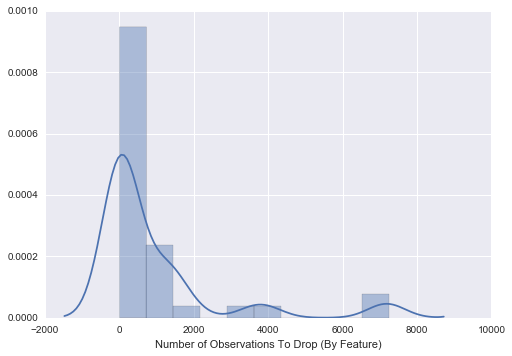

In [10]:
import seaborn as sns

sns.distplot(tomato_user_list.isnull().sum() )
plt.xlabel('Number of Observations To Drop (By Feature)')


In [11]:
tomato_user_list.isnull().sum() 

Unnamed: 0                0
metascore              3608
year                      0
tomato_rating          1282
tomato_meter           1325
plot                     20
rated                   565
tomato_rotten          1281
title                     0
tomato_consensus       3963
writer                  116
tomato_user_meter         0
production              494
actors                    4
tomato_fresh           1281
imdb_votes               10
type                      0
tomato_user_reviews       0
website                7124
poster                   42
imdb_id                   0
director                 27
released                 65
tomato_reviews         1325
awards                 1846
tomato_user_rating        0
genre                     3
response                  0
language                  2
dvd                     397
imdb_rating               9
country                   1
tomato_image           1282
runtime                  17
box_office             7236
dtype: int64

In [12]:
df = tomato_user_list
df.dropna(axis=0, inplace=0, how='any', subset=['dvd'])
df.dropna(axis=0, inplace=0, how='any', subset=['tomato_rating'])
#df.dropna(axis=0, inplace=0, how='any', subset=['tomato_user_rating']) #did this above
df.dropna(axis=0, inplace=1, how='any', subset=['tomato_fresh'])
df.dropna(axis=0, inplace=1, how='any', subset=['tomato_meter'])
df.dropna(axis=0, inplace=1, how='any', subset=['production'])
df.dropna(axis=0, inplace=1, how='any', subset=['tomato_rating'])
df.dropna(axis=0, inplace=1, how='any', subset=['rated'])
df.dropna(axis=0, inplace=1, how='any', subset=['imdb_votes'])
df.dropna(axis=0, inplace=1, how='any', subset=['tomato_user_reviews'])
df.dropna(axis=0, inplace=1, how='any', subset=['imdb_rating'])
df.dropna(axis=0, inplace=1, how='any', subset=['dvd'])
df.dropna(axis=0, inplace=1, how='any', subset=['rated'])
df.dropna(axis=0, inplace=1, how='any', subset=['metascore']) #this drops a whole 2000 values, need to investigate bias



/Users/HudsonCavanagh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/HudsonCavanagh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/HudsonCavanagh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/HudsonCavanagh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning

In [13]:


quants_working = df.loc[:,['metascore', 'tomato_rating','tomato_meter','tomato_rotten','tomato_user_meter','tomato_fresh', 'tomato_user_reviews', 'tomato_reviews', 'imdb_rating']]

#print(len(df),df.isnull().sum())

quants_working.isnull().sum().sum() #quants are ready to go!

0

In [14]:
#### Actor frequency feature beginning
# master_actor_list = []
# for i in tomato_user_list['actors']:
#     for h in str(i).split(", "):
#         master_actor_list.append(h)
# master_actor_list = pd.Series(master_actor_list)
# len(master_actor_list)


#Features to extract:


#Dummies:
# rated
# genre (first listed)
# language (first listed)
# country

#Cont:
#count(languages)

#Datetime: 
#Year
#DVD
#Diff Year DVD



In [15]:
#FEATURE EXTRACTION EXTRAVAGANZA!


def genre_clean(char):
    a = str(char).split(",")[0].strip().lower()
    return(a)
    
df['genre_1st'] = df['genre'].apply(genre_clean)

genre_dums = pd.get_dummies(df['genre_1st'])
df = pd.concat([df, genre_dums], axis =1)

df['country_1st'] = df['country'].apply(genre_clean)

country_dums = pd.get_dummies(df['country_1st'])
df = pd.concat([df, country_dums], axis =1)

df['language_1st'] = df['language'].apply(genre_clean)

language_dums = pd.get_dummies(df['language_1st'])
df = pd.concat([df, language_dums], axis =1)

rating_dums = pd.get_dummies(df['rated'])
df = pd.concat([df, rating_dums], axis =1)



def lang_counter(entry):
    return(float(entry.count(","))+1)


df['lang_count'] = df['language'].apply(lang_counter)


df['theater_date'] = pd.to_datetime(df['year'],infer_datetime_format=1)# optional arguement for trying various options out should be on
df['dvd_date'] = pd.to_datetime(df['dvd'],infer_datetime_format=1)# optional arguement for trying various options out should be on

df['delta_theater_dvd'] = df['dvd_date'] - df['theater_date']


# genre_dums


df.head()

/Users/HudsonCavanagh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Unnamed: 0,metascore,year,tomato_rating,tomato_meter,plot,rated,tomato_rotten,title,tomato_consensus,...,NOT RATED,PG,PG-13,R,UNRATED,X,lang_count,theater_date,dvd_date,delta_theater_dvd
12,12,75,2013,7.3,83,A young woman's world unravels when a drug pre...,R,34,Side Effects,"A smart, clever thriller with plenty of disqui...",...,0,0,0,1,0,0,2,2013-01-01,2013-05-21,140 days
19,19,45,1998,5.7,54,"A half-vampire, half-mortal man becomes a prot...",R,43,Blade,"Though some may find the plot a bit lacking, B...",...,0,0,0,1,0,0,2,1998-01-01,1998-12-22,355 days
67,67,91,1989,8.9,93,On the hottest day of the year on a street in ...,R,5,Do the Right Thing,"Smart, vibrant, and urgent without being didac...",...,0,0,0,1,0,0,4,1989-01-01,2009-06-30,7485 days
73,73,34,2003,4.5,21,A DEA agent investigates the disappearance of ...,R,112,Basic,Basic gets so needlessly convoluted in its plo...,...,0,0,0,1,0,0,1,2003-01-01,2003-07-08,188 days
74,74,64,1984,7.1,83,A freewheeling Detroit cop pursuing a murder i...,R,7,Beverly Hills Cop,NaN,...,0,0,0,1,0,0,1,1984-01-01,2002-01-29,6603 days


In [16]:
#Dummies for studios made no sense, so bucketing these according to the top 6 of Wikipedias 8 golden production companies


def columbia_scorer(entry):
    columbia_list = ["columbia"]
    final = 0
    for i in columbia_list:
        if i in entry.lower():
            final = 1
            return(final)
        else: 
            continue
    return (final)


def fox_scorer(entry):
    fox_twenth_list = ["20th century", "fox", "20th"]
    final = 0
    for i in fox_twenth_list:
        if i in entry.lower():
            final = 1
            return(final)
        else: 
            continue
    return (final)


def wb_scorer(entry):
    wb_list = ["wb", "warner", "bros"]
    final = 0
    for i in wb_list:
        if i in entry.lower():
            final = 1
            return(final)
        else: 
            continue
    return (final)


def para_scorer(entry):
    paramount_list = ["paramount"]
    final = 0
    for i in paramount_list:
        if i in entry.lower():
            final = 1
            return(final)
        else: 
            continue
    return (final)

def univer_scorer(entry):
    universal_list = ["universal"]    
    final = 0
    for i in universal_list:
        if i in entry.lower():
            final = 1
            return(final)
        else: 
            continue
    return (final)

def mgm_scorer(entry):
    mgm_ua_list = ["mgm", 'ua', 'united artists', 'metro', 'goldwin','mayer']
    final = 0
    for i in mgm_ua_list:
        if i in entry.lower():
            final = 1
            return(final)
        else: 
            continue
    return (final)

def production_scorer(entry):
    all_list = ["columbia","20th century", "fox", "20th","wb", "warner", "bros","paramount","universal","mgm", 'ua', 'united artists', 'metro', 'goldwin','mayer']
    final = 0
    for i in all_list:
        if i in entry.lower():
            final = 1
            return(final)
        else: 
            continue
    return (final)
    

df['major_studio'] = df['production'].apply(production_scorer)
df['fox_20th'] = df['production'].apply(fox_scorer)
df['wb_studio'] = df['production'].apply(wb_scorer)
df['paramount'] = df['production'].apply(para_scorer)
df['universal'] = df['production'].apply(univer_scorer)
df['mgm'] = df['production'].apply(mgm_scorer)
df['columbia'] = df['production'].apply(columbia_scorer)


In [17]:

# #count(languages)




# top_250['year'] = top_250['year'].astype(int) #should i make this feature, years since release? 2016-x?
df['theater_date'] = pd.to_datetime(df['year'],infer_datetime_format=1)# optional arguement for trying various options out should be on
df['dvd_date'] = pd.to_datetime(df['dvd'],infer_datetime_format=1)# optional arguement for trying various options out should be on

df['delta_theater_dvd'] = df['dvd_date'] - df['theater_date']


In [18]:
def vote_clean(item):
    a = str(item)
    b = a.replace(',', '')
    return float(b)


df['imdb_votes'] = df['imdb_votes'].apply(vote_clean)
df['years_dvd-theatre'] = df['delta_theater_dvd'].apply(lambda x: float(x)/31536000) 


In [19]:
y = df['tomato_user_meter']
# taking out 'tomato_rotten, about to present and my scores aren't matching up
df.drop(['delta_theater_dvd','Unnamed: 0','tomato_user_rating', 'tomato_user_meter'], axis=1, inplace=1)
df['constant']= 1
df.head()

,metascore,year,tomato_rating,tomato_meter,plot,rated,tomato_rotten,title,tomato_consensus,writer,...,dvd_date,major_studio,fox_20th,wb_studio,paramount,universal,mgm,columbia,years_dvd-theatre,constant
12,75,2013,7.3,83,A young woman's world unravels when a drug pre...,R,34,Side Effects,"A smart, clever thriller with plenty of disqui...",Scott Z. Burns,...,2013-05-21,0,0,0,0,0,0,0,3.835616e+08,1
19,45,1998,5.7,54,"A half-vampire, half-mortal man becomes a prot...",R,43,Blade,"Though some may find the plot a bit lacking, B...",David S. Goyer,...,1998-12-22,0,0,0,0,0,0,0,9.726027e+08,1
67,91,1989,8.9,93,On the hottest day of the year on a street in ...,R,5,Do the Right Thing,"Smart, vibrant, and urgent without being didac...",Spike Lee,...,2009-06-30,1,0,0,0,1,0,0,2.050685e+10,1
73,34,2003,4.5,21,A DEA agent investigates the disappearance of ...,R,112,Basic,Basic gets so needlessly convoluted in its plo...,James Vanderbilt,...,2003-07-08,0,0,0,0,0,0,0,5.150685e+08,1
74,64,1984,7.1,83,A freewheeling Detroit cop pursuing a murder i...,R,7,Beverly Hills Cop,NaN,"Daniel Petrie Jr. (screenplay), Danilo Bach (s...",...,2002-01-29,1,0,0,1,0,0,0,1.809041e+10,1


In [20]:
features = df[df.describe().columns] #this saved writing all of the ones I wanted to take out down....

features.head()

,metascore,tomato_rating,tomato_meter,tomato_rotten,tomato_fresh,imdb_votes,tomato_user_reviews,tomato_reviews,imdb_rating,action,...,lang_count,major_studio,fox_20th,wb_studio,paramount,universal,mgm,columbia,years_dvd-theatre,constant
12,75,7.3,83,34,166,147422,69015,200,7.1,0,...,2,0,0,0,0,0,0,0,3.835616e+08,1
19,45,5.7,54,43,50,189074,498735,93,7.1,1,...,2,0,0,0,0,0,0,0,9.726027e+08,1
67,91,8.9,93,5,62,58887,72518,67,7.9,0,...,4,1,0,0,0,1,0,0,2.050685e+10,1
73,34,4.5,21,112,30,49556,56593,142,6.5,1,...,1,0,0,0,0,0,0,0,5.150685e+08,1
74,64,7.1,83,7,35,125218,376783,42,7.3,1,...,1,1,0,0,1,0,0,0,1.809041e+10,1


In [21]:
len(features)

3497

In [22]:
features.isnull().sum().sum() #0

0

In [23]:
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit_transform(features)
X = pd.DataFrame(X, columns=features.columns)
#y is declared above

In [24]:
X.head()

,metascore,tomato_rating,tomato_meter,tomato_rotten,tomato_fresh,imdb_votes,tomato_user_reviews,tomato_reviews,imdb_rating,action,...,lang_count,major_studio,fox_20th,wb_studio,paramount,universal,mgm,columbia,years_dvd-theatre,constant
0,1.137396,1.021965,1.015925,-0.286064,1.842900,0.340205,-0.131408,1.452910,0.590058,-0.492213,...,0.432791,-0.855095,-0.331902,-0.339286,-0.289256,-0.288675,-0.190127,-0.180214,-0.503248,0
1,-0.527934,-0.056799,-0.032845,-0.029304,-0.215382,0.615496,-0.001935,-0.203873,0.590058,2.031641,...,0.432791,-0.855095,-0.331902,-0.339286,-0.289256,-0.288675,-0.190127,-0.180214,-0.381904,0
2,2.025572,2.100730,1.377569,-1.113403,-0.002456,-0.244949,-0.130352,-0.606455,1.368970,-0.492213,...,2.418970,1.169460,-0.331902,-0.339286,-0.289256,3.464102,-0.190127,-0.180214,3.642227,0
3,-1.138555,-0.865873,-1.226272,1.939191,-0.570258,-0.306621,-0.135150,0.554841,0.005875,2.031641,...,-0.560299,-0.855095,-0.331902,-0.339286,-0.289256,-0.288675,-0.190127,-0.180214,-0.476157,0
4,0.526775,0.887120,1.015925,-1.056345,-0.481539,0.193452,-0.038678,-0.993554,0.784786,2.031641,...,-0.560299,1.169460,-0.331902,-0.339286,3.457145,-0.288675,-0.190127,-0.180214,3.144431,0


/Users/HudsonCavanagh/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/HudsonCavanagh/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


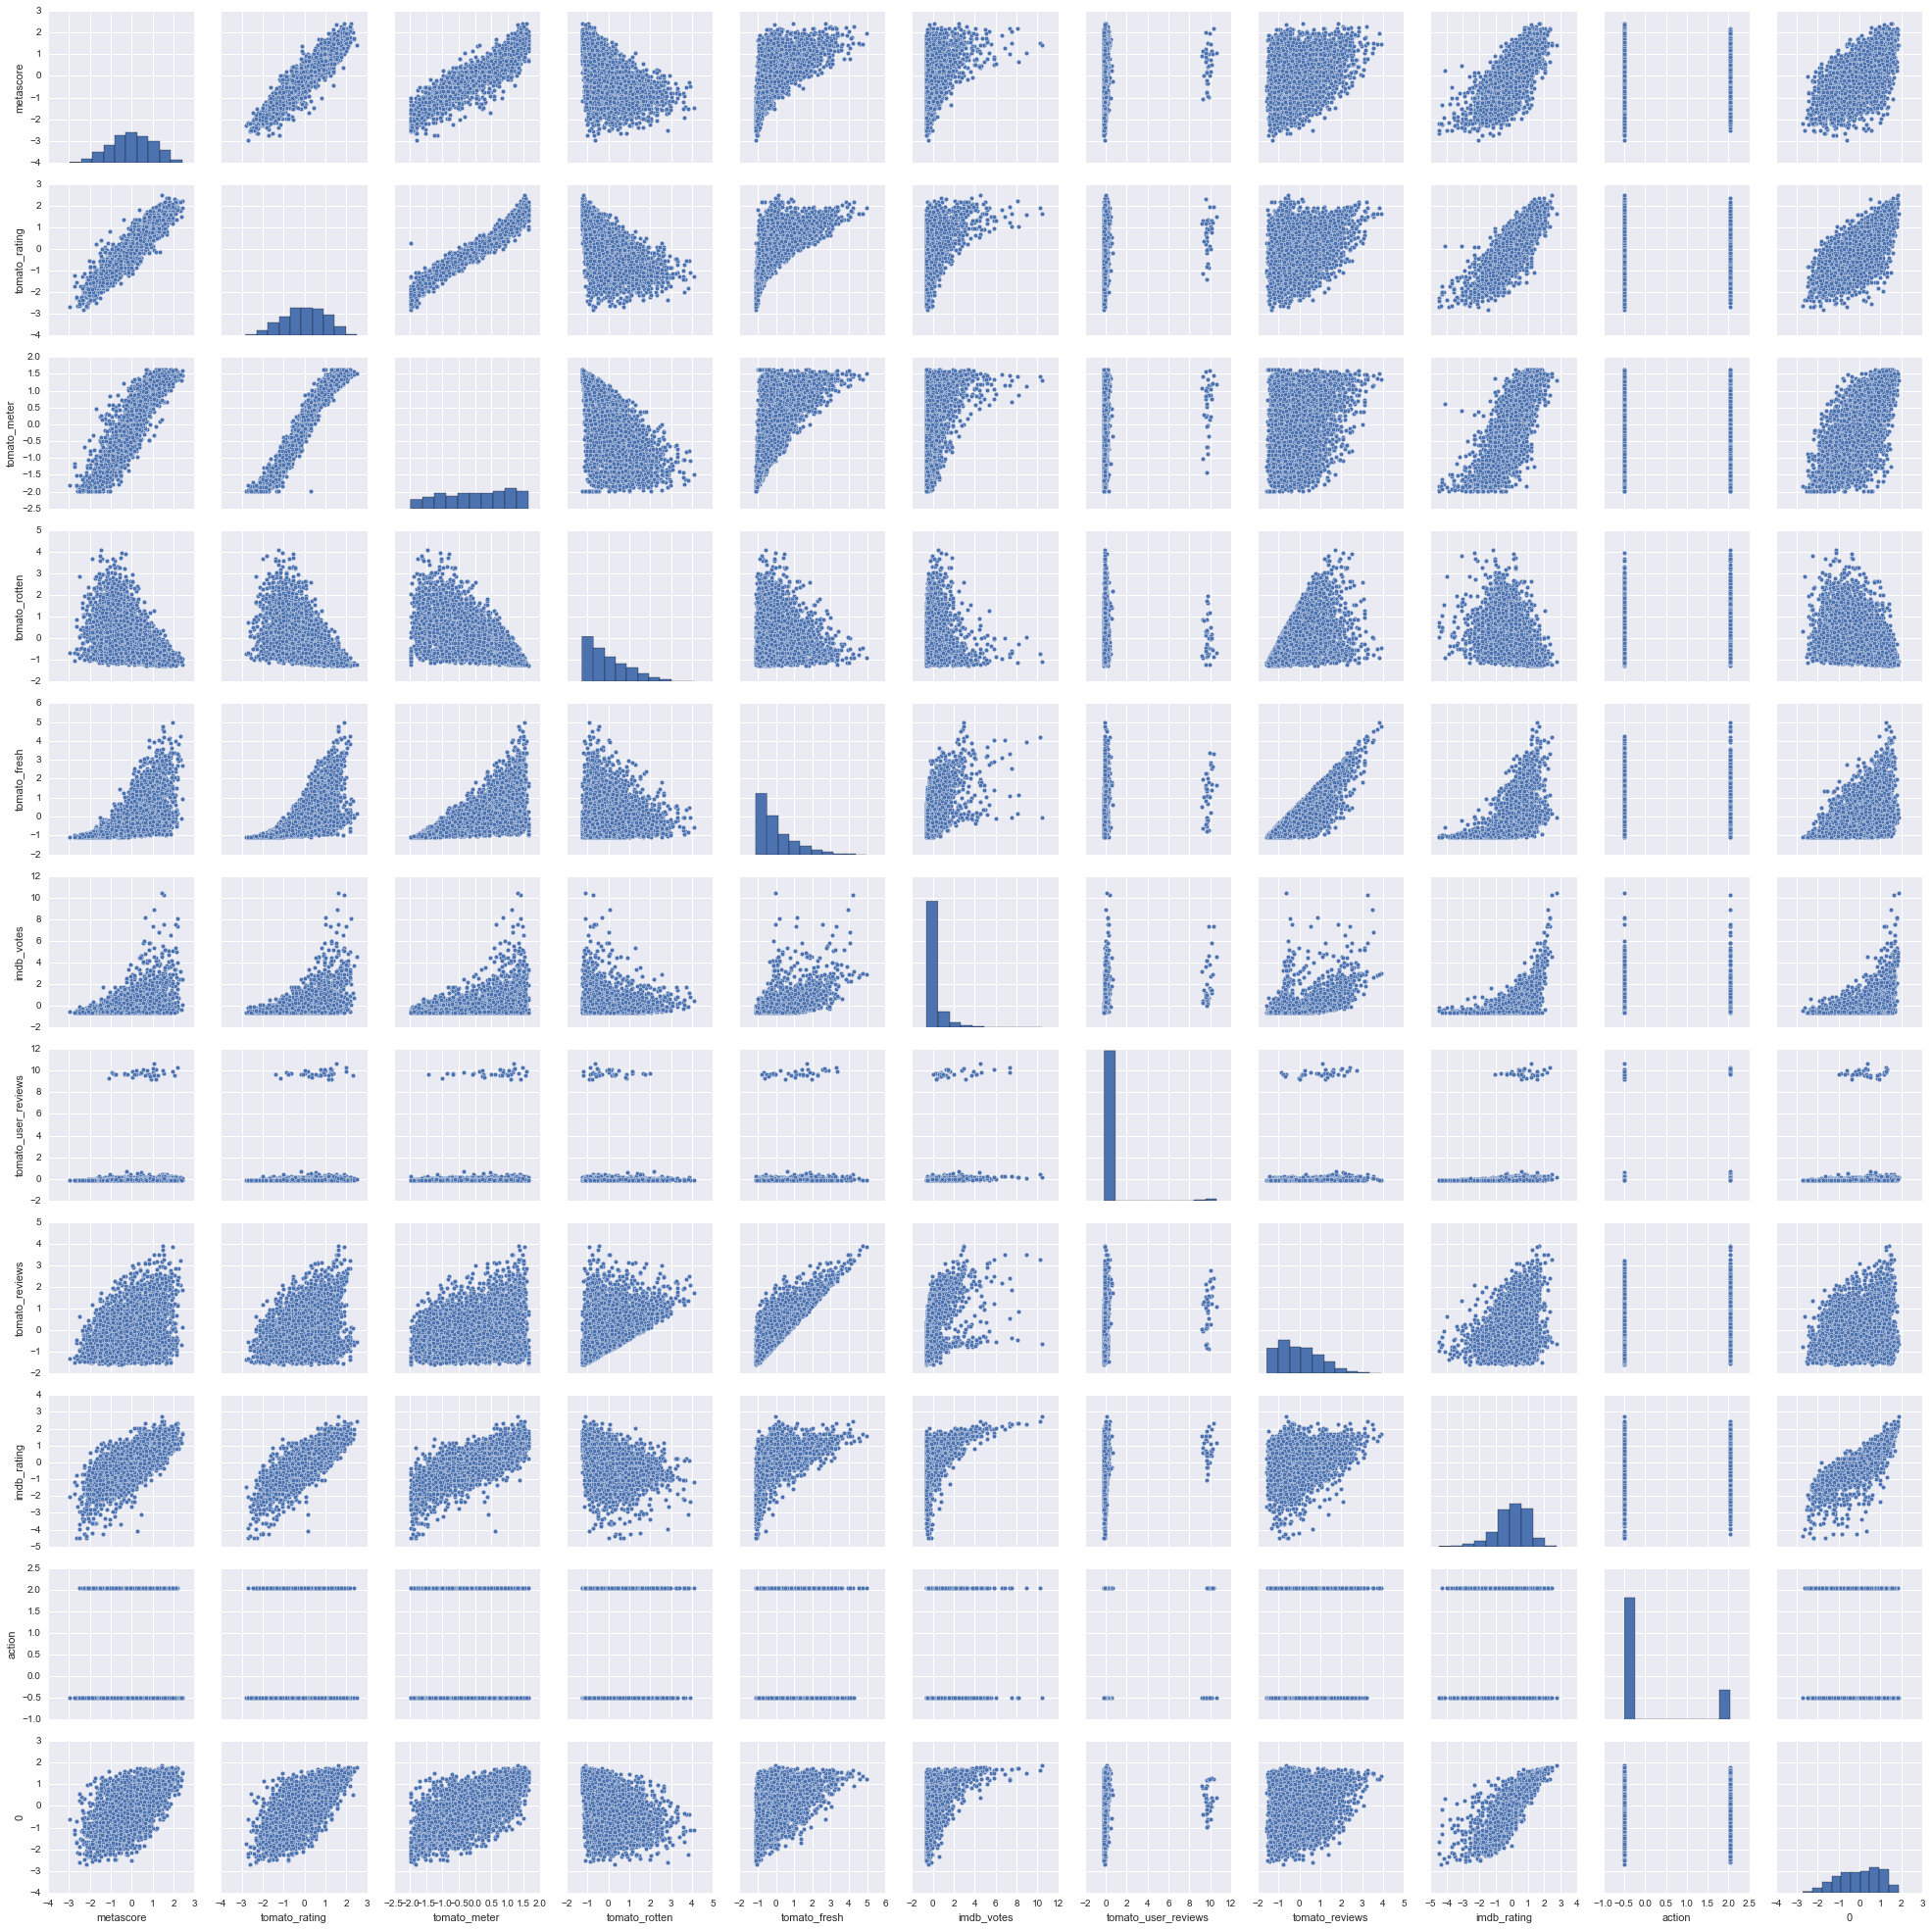

In [25]:
y_scale = preprocessing.StandardScaler().fit_transform(y)
y_scale = pd.DataFrame(y_scale)



collin_check = pd.concat([X.iloc[:,:10], y_scale], axis=1)

sns.pairplot(collin_check)




In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.cross_validation import StratifiedKFold, permutation_test_score
from sklearn.tree import DecisionTreeRegressor

stratk = StratifiedKFold(y, n_folds=10, shuffle=True, random_state=66)


dt_simple = DecisionTreeRegressor(min_samples_leaf=4, min_samples_split=6, max_depth=6)

s_dt = cross_val_score(dt_simple, X, y, cv=stratk, n_jobs=-1)

print("Decision Tree", s_dt.mean())




('Decision Tree', 0.5415976950225716)


In [27]:
foo = X.columns
print(foo)

Index([u'metascore', u'tomato_rating', u'tomato_meter', u'tomato_rotten',
       u'tomato_fresh', u'imdb_votes', u'tomato_user_reviews',
       u'tomato_reviews', u'imdb_rating', u'action',
       ...
       u'lang_count', u'major_studio', u'fox_20th', u'wb_studio', u'paramount',
       u'universal', u'mgm', u'columbia', u'years_dvd-theatre', u'constant'],
      dtype='object', length=104)


In [55]:
dt = DecisionTreeRegressor(min_samples_leaf=4, min_samples_split=6, max_depth=6)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=50)


dt.fit(X_train, y_train)
ypred_tree = dt.predict(X_test)
# dt.predict(y_test)

In [29]:
y_train.mean()

61.508112724167376

In [30]:
feature_importances_dt = pd.DataFrame(dt.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
print(feature_importances_dt)

                     importance
imdb_rating            0.785286
tomato_user_reviews    0.038691
imdb_votes             0.034112
years_dvd-theatre      0.025117
metascore              0.018142
tomato_rotten          0.015019
tomato_meter           0.012900
tomato_rating          0.011480
tomato_reviews         0.011145
tomato_fresh           0.009555
R                      0.005909
comedy                 0.004163
lang_count             0.004130
fox_20th               0.002241
biography              0.002231
mgm                    0.001769
major_studio           0.001670
drama                  0.001628
PG-13                  0.001516
paramount              0.001484
animation              0.001088
germany                0.001083
universal              0.000909
PG                     0.000844
usa                    0.000811
columbia               0.000806
adventure              0.000709
wb_studio              0.000683
action                 0.000666
france                 0.000600
...     

In [31]:
X2 = X
X2.drop("imdb_rating", inplace=1, axis=1)

In [32]:
## sample thing as above, without imdb score



dt_2 = DecisionTreeRegressor()
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.33, random_state=50)

s_dt_2 = cross_val_score(dt_2, X2, y, cv=stratk, n_jobs=-1)

s_dt_2.mean()

# dt_2.fit(X2_train, y2_train)
# # dt.predict(y_test)


0.25494923397780606

In [33]:
dt_2.fit(X2_train, y2_train)
feature_importances_dt_2 = pd.DataFrame(dt_2.feature_importances_,
                                   index = X2.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
print(feature_importances_dt_2)

                     importance
tomato_rating          0.500012
tomato_meter           0.078830
imdb_votes             0.074974
tomato_user_reviews    0.073332
years_dvd-theatre      0.047801
tomato_rotten          0.042624
metascore              0.033021
tomato_reviews         0.030513
tomato_fresh           0.021872
lang_count             0.009962
action                 0.008803
horror                 0.008327
R                      0.006913
PG-13                  0.005861
comedy                 0.005456
drama                  0.005373
wb_studio              0.005252
biography              0.005023
fox_20th               0.004874
uk                     0.004175
paramount              0.003562
usa                    0.003550
major_studio           0.002334
universal              0.002252
PG                     0.001825
thriller               0.001810
english                0.001755
family                 0.001532
animation              0.001471
columbia               0.001393
...     

In [34]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier


bc = BaggingRegressor(n_estimators=1000)
rfc = RandomForestRegressor(n_estimators=1000) #.948 before, .962 after

bc_cv = BaggingRegressor(n_estimators=1000)
rfc_cv = RandomForestRegressor(n_estimators=1000) #.948 before, .962 after


bc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

ypredbc = bc.predict(X_test)
ypredrfc = rfc.predict(X_test)

s_bc_cv = cross_val_score(bc_cv, X, y, cv=stratk, n_jobs=-1)


feature_importances_rfc = pd.DataFrame(rfc.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
s_rfc_cv = cross_val_score(rfc_cv, X, y, cv=stratk, n_jobs=-1)


print(feature_importances_rfc.round())


                     importance
imdb_rating                   1
tomato_user_reviews           0
imdb_votes                    0
years_dvd-theatre             0
tomato_rotten                 0
metascore                     0
tomato_reviews                0
tomato_meter                  0
tomato_fresh                  0
tomato_rating                 0
R                             0
comedy                        0
lang_count                    0
drama                         0
major_studio                  0
fox_20th                      0
PG-13                         0
PG                            0
action                        0
wb_studio                     0
biography                     0
usa                           0
paramount                     0
crime                         0
universal                     0
animation                     0
uk                            0
columbia                      0
G                             0
mgm                           0
...     

In [35]:
print("random forest R2:", s_rfc_cv.mean(), "bagging R2:", s_bc_cv.mean())

('random forest R2:', 0.62581665702710176, 'bagging R2:', 0.62609107479882742)


In [36]:
print(feature_importances_rfc.round(4))

                     importance
imdb_rating              0.7872
tomato_user_reviews      0.0441
imdb_votes               0.0289
years_dvd-theatre        0.0236
tomato_rotten            0.0168
metascore                0.0145
tomato_reviews           0.0132
tomato_meter             0.0120
tomato_fresh             0.0107
tomato_rating            0.0104
R                        0.0044
comedy                   0.0044
lang_count               0.0037
drama                    0.0023
major_studio             0.0021
fox_20th                 0.0018
PG-13                    0.0017
PG                       0.0017
action                   0.0016
wb_studio                0.0013
biography                0.0012
usa                      0.0011
paramount                0.0010
crime                    0.0009
universal                0.0008
animation                0.0008
uk                       0.0008
columbia                 0.0007
G                        0.0007
mgm                      0.0007
...     

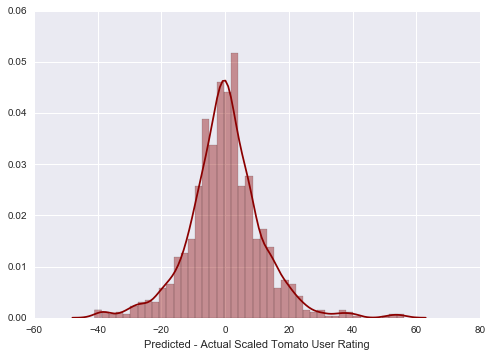

In [37]:
diff_pred_reality = ypred_tree - y_test
sns.distplot(diff_pred_reality, color='darkred') #looks pretty good
plt.xlabel('Predicted - Actual Scaled Tomato User Rating')



In [38]:
# test = pd.concat([y_test, X], axis=1)

In [39]:
# from IPython.display import Image
# from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO
# import pydotplus

# dot_data = StringIO()  
# export_graphviz(dt, out_file=dot_data,  
#                 feature_names=X.columns,  
#                 filled=True, rounded=True,  
#                 special_characters=True)  
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

In [40]:
# diff_df = pd.merge(test, X_test, how='left', left_index=1, right_index=1)
# diff_df.head()nope

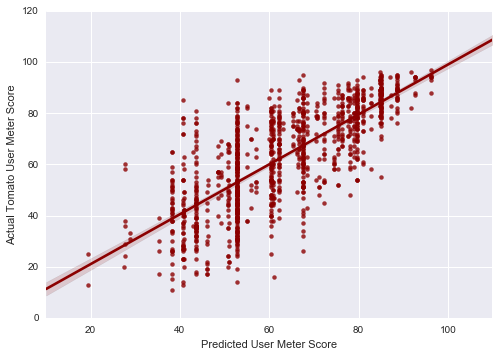

In [56]:
sns.regplot(ypred_tree, y_test, color="darkred")
plt.xlabel('Predicted User Meter Score')
plt.ylabel('Actual Tomato User Meter Score')
plt.show()

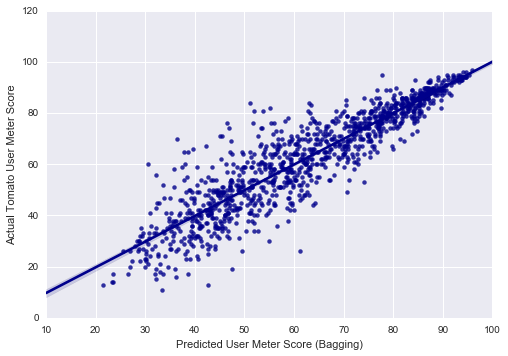

In [48]:
sns.regplot(ypredbc, y_test, color="darkblue")
plt.xlabel('Predicted User Meter Score (Bagging)')
plt.ylabel('Actual Tomato User Meter Score')
plt.show()

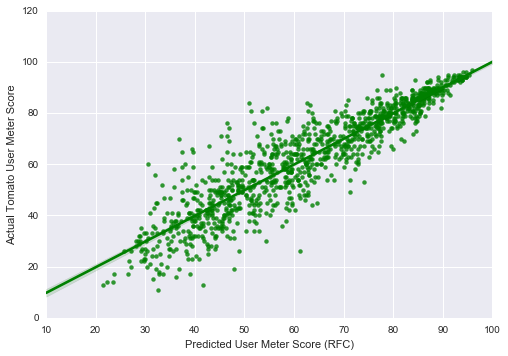

In [43]:
sns.regplot(ypredrfc, y_test, color="green")
plt.xlabel('Predicted User Meter Score (RFC)')
plt.ylabel('Actual Tomato User Meter Score')
plt.show()

In [59]:
from sklearn.ensemble import GradientBoostingRegressor

gb_tree = GradientBoostingRegressor(n_estimators=1000)
gb_tree_cv = GradientBoostingRegressor(n_estimators=1000, max_depth=10, max_features=10)

gb_tree.fit(X_train, y_train)
ypred_gbtree = gb_tree.predict(X_test)
gb_tree_cv.fit(X, y)

s_gb_tree_cv = cross_val_score(gb_tree_cv, X, y, cv=stratk, n_jobs=-1)
s_gb_tree_cv.mean()


0.61557488455978815

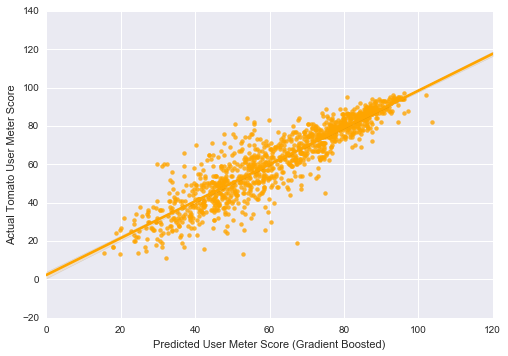

In [57]:
sns.regplot(ypred_gbtree, y_test, color="orange")
plt.xlabel('Predicted User Meter Score (Gradient Boosted)')
plt.ylabel('Actual Tomato User Meter Score')
plt.show()

In [ ]:
from sklearn.grid_search import GridSearchCV

split_vals = [2,3,4,5,6,7,8,9]
depths = [3,4,5,6,7,8,9,10]
max_feats = [3,4,5,6,7,8,10,12,14,20]

gs = GridSearchCV(gb_tree, {'min_samples_split': split_vals, 'max_depth': depths, 'max_features': max_feats}, cv=15)
gs.fit(X_train, y_train)



In [ ]:
gs.best_params_

In [ ]:
gb_tree_gs = GradientBoostingRegressor(min_samples_splits=gs.best_params_['min_samples_split'], max_depth=gs.best_params_['max_depth'], max_features=gs.best_params_['max_features'])

gb_tree_gs.fit(X_train, y_train)
gb_tree_gs_ypred = gb_tree_gs.predict(X_test)

gb_tree_gs_cv = GradientBoostingRegressor(min_samples_splits=gs.best_params_['min_samples_split'], max_depth=gs.best_params_['max_depth'], max_features=gs.best_params_['max_features'])
gb_tree_gs_cv.fit(X, y)
s_gb_tree_cv = cross_val_score(gb_tree_gs_cv, X, y, cv=stratk, n_jobs=-1)
s_gb_tree_cv.mean()


In [ ]:
sns.regplot(gb_tree_gs_ypred, y_test, color="purple")
plt.xlabel('Predicted User Meter Score (Gradient Boosted GS)')
plt.ylabel('Actual Tomato User Meter Score')
plt.show()

In [ ]:
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

plt.show()